In [1]:
import pandas as pd
from scipy import stats #Para prueba de hipótesis Media
from statsmodels.stats.proportion import proportions_ztest #Para prueba de hipótesis Proporción
import numpy as np #Para cálculos numéricos
import seaborn as sns

In [2]:
df_vehiculos = pd.read_csv("DatosProyInferencia.csv", encoding= "latin-1")
df_vehiculos.head()

,Fabricante,Tipo de Vehículo\n0=automovil 1=camoineta,Motor,Potencia (horsepower),Rendimiento\nMillas por Galon
0,Chevrolet,0.0,3.1,175,25
1,Chrysler,0.0,2.0,132,27
2,Dodge,0.0,2.5,168,24
3,Dodge,0.0,8.0,450,16
4,Dodge,1.0,5.2,230,17


In [3]:
df_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Fabricante                                50 non-null     object 
 1   Tipo de Vehículo
0=automovil 1=camoineta  50 non-null     float64
 2   Motor                                     50 non-null     float64
 3   Potencia (horsepower)                     51 non-null     object 
 4   Rendimiento
Millas por Galon              51 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.1+ KB


In [4]:
#Convirtiendo las columnas Potencia y Rendimiento a enteros

columnas_numericas = ["Potencia (horsepower)", "Rendimiento\nMillas por Galon"]

for col in columnas_numericas:
    # 1. Intentamos forzar la conversión a número (float).
    # El argumento 'coerce' es clave: si encuentra cualquier valor que NO sea un número,
    # lo reemplazará con NaN (Not a Number), permitiendo la conversión.
    df_vehiculos[col] = pd.to_numeric(df_vehiculos[col], errors='coerce')
df_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Fabricante                                50 non-null     object 
 1   Tipo de Vehículo
0=automovil 1=camoineta  50 non-null     float64
 2   Motor                                     50 non-null     float64
 3   Potencia (horsepower)                     50 non-null     float64
 4   Rendimiento
Millas por Galon              50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#Renombrando la columna Tipo de Vehiculo, Potencia & "Rendimiento"
# Mapeo: {nombre_antiguo: nombre_nuevo}
df_vehiculos.rename(
    columns={"Tipo de Vehículo\n0=automovil 1=camoineta": "Tipo_Vehiculo", "Potencia (horsepower)": "Potencia", "Rendimiento\nMillas por Galon": "Rendimiento"},
    inplace=True
)

# Ahora puedes ver el cambio (y usar el nuevo nombre en el filtrado):
print(df_vehiculos.head())

      Fabricante  Tipo_Vehiculo  Motor  Potencia  Rendimiento
0  Chevrolet                0.0    3.1     175.0         25.0
1  Chrysler                 0.0    2.0     132.0         27.0
2  Dodge                    0.0    2.5     168.0         24.0
3  Dodge                    0.0    8.0     450.0         16.0
4  Dodge                    1.0    5.2     230.0         17.0


In [6]:
# Mapeo: {valor_actual: nuevo_valor}
mapeo_vehiculo = {
    0.0: "Automovil",  # El 0.0 será cambiado a "Automovil"
    1.0: "Camioneta"  # El 1.0 será cambiado a "Camioneta"
}

# Aplicar el reemplazo a la columna "Tipo_Vehiculo"
# Utilizamos inplace=True para modificar el DataFrame original
df_vehiculos["Tipo_Vehiculo"].replace(mapeo_vehiculo, inplace=True)

# Opcional: Mostrar los primeros valores para verificar el cambio
print(df_vehiculos["Tipo_Vehiculo"].head())

0    Automovil
1    Automovil
2    Automovil
3    Automovil
4    Camioneta
Name: Tipo_Vehiculo, dtype: object


C:\Users\mathi\AppData\Local\Temp\ipykernel_10796\282344150.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_vehiculos["Tipo_Vehiculo"].replace(mapeo_vehiculo, inplace=True)


In [7]:
# grafico de dispersion motor, outliers
# Build the valores_atipicos_encontrados dictionary first
valores_atipicos_encontrados = {}
variables_numericas = ['Motor', 'Potencia', 'Rendimiento']

for columna in variables_numericas:
    Q1 = df_vehiculos[columna].quantile(0.25)
    Q3 = df_vehiculos[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df_vehiculos[(df_vehiculos[columna] < limite_inferior) | (df_vehiculos[columna] > limite_superior)]
    valores_atipicos_encontrados[columna] = outliers[columna].tolist() if not outliers.empty else []

plt.figure(figsize=(10, 6))
plt.scatter(df_vehiculos.index, df_vehiculos["Motor"], color='blue', label='Motor')
if valores_atipicos_encontrados["Motor"]:
    plt.scatter(df_vehiculos.index[df_vehiculos["Motor"].isin(valores_atipicos_encontrados["Motor"])],
                df_vehiculos["Motor"][df_vehiculos["Motor"].isin(valores_atipicos_encontrados["Motor"])],
                color='red', label='Outliers')
plt.xlabel('Índice')
plt.ylabel('Motor')
plt.title('Gráfico de dispersión de Motor con Outliers')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

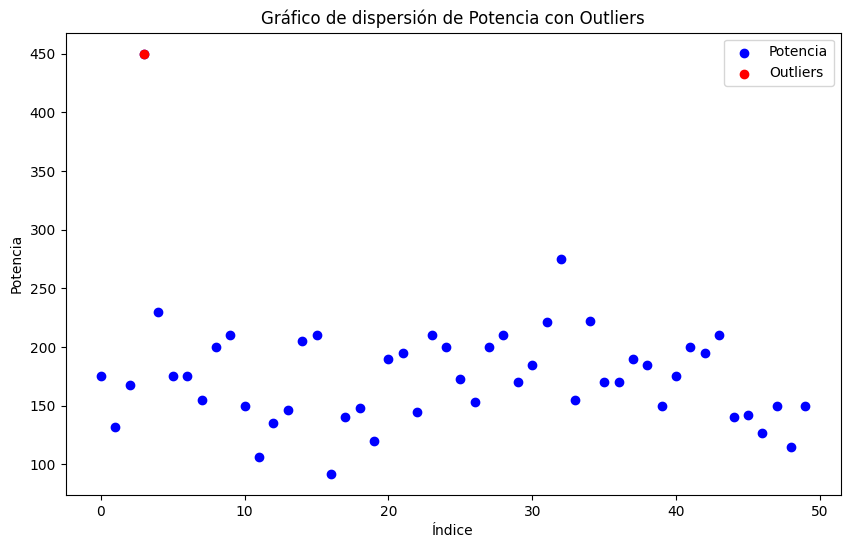

In [ ]:
# grafico de dispersion potencia, outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_vehiculos.index, df_vehiculos["Potencia"], color='blue', label='Potencia')
plt.scatter(df_vehiculos.index[df_vehiculos["Potencia"].isin(valores_atipicos_encontrados["Potencia"])],
            df_vehiculos["Potencia"][df_vehiculos["Potencia"].isin(valores_atipicos_encontrados["Potencia"])],
            color='red', label='Outliers')
plt.xlabel('Índice')
plt.ylabel('Potencia')
plt.title('Gráfico de dispersión de Potencia con Outliers')
plt.legend()
plt.show()

In [ ]:
variables_numericas = ['Motor', 'Potencia', 'Rendimiento']
outlier_indices = set() # Para almacenar los índices únicos de las filas a eliminar

print("--- 🔬 Análisis de Intervalos Atípicos (Método IQR) ---")

for columna in variables_numericas:
    Q1 = df_vehiculos[columna].quantile(0.25)
    Q3 = df_vehiculos[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar filas atípicas y almacenar sus índices
    outliers = df_vehiculos[(df_vehiculos[columna] < limite_inferior) | (df_vehiculos[columna] > limite_superior)]
    outlier_indices.update(outliers.index)
    
    print(f"\nColumna: **{columna}**")
    print(f"  Rango Aceptable (LI a LS): [{limite_inferior:.2f}, {limite_superior:.2f}]")
    
    if not outliers.empty:
        valores = outliers[columna].tolist()
        print(f"  Valores Atípicos Encontrados: {valores}")
        
    else:
        print("  No se encontraron valores atípicos.")

print("\n--- ✅ Resumen de Atípicos ---")
print(f"Total de filas a eliminar: {len(outlier_indices)}")

--- 🔬 Análisis de Intervalos Atípicos (Método IQR) ---

Columna: **Motor**
  Rango Aceptable (LI a LS): [0.30, 5.90]
  Valores Atípicos Encontrados: [8.0]

Columna: **Potencia**
  Rango Aceptable (LI a LS): [71.25, 277.25]
  Valores Atípicos Encontrados: [450.0]

Columna: **Rendimiento**
  Rango Aceptable (LI a LS): [12.50, 32.50]
  No se encontraron valores atípicos.

--- ✅ Resumen de Atípicos ---
Total de filas a eliminar: 1


In [ ]:
# Eliminar fila con valor atipico
df_vehiculos.drop(list(outlier_indices), axis=0, inplace=True)

In [ ]:
grupos = df_vehiculos.groupby("Tipo_Vehiculo")

# Calcular la media y desviación estándar de las características numéricas para cada grupo
comparacion_descriptiva = grupos[["Motor", "Potencia", "Rendimiento"]].agg(['mean', 'std'])

print(comparacion_descriptiva)

                  Motor              Potencia            Rendimiento          
                   mean       std        mean        std        mean       std
Tipo_Vehiculo                                                                 
Automovil      2.803704  0.882950  168.592593  40.857406   25.518519  2.750809
Camioneta      3.381818  0.774988  176.954545  29.014737   20.045455  2.853190


PRUEBA DE HIPÓTESIS PARA LAS MEDIAS (DIFERENTES VARIANZAS)

In [ ]:
# Extraer los datos para cada grupo
automoviles = df_vehiculos[df_vehiculos["Tipo_Vehiculo"] == 'Automovil']
camionetas = df_vehiculos[df_vehiculos["Tipo_Vehiculo"] == 'Camioneta']

print(f"Conteo de Automóviles: {len(automoviles)}")
print(f"Conteo de Camionetas: {len(camionetas)}\n")

Conteo de Automóviles: 27
Conteo de Camionetas: 22



In [ ]:
#Prueba de Hipótesis

GROUPING_VAR = "Tipo_Vehiculo"
ALPHA = 0.05 # Nivel de significación
VARIABLES_TO_TEST = ['Motor', 'Potencia', 'Rendimiento']

# Extraer los datos para cada grupo
automoviles = df_vehiculos[df_vehiculos[GROUPING_VAR] == 'Automovil']
camionetas = df_vehiculos[df_vehiculos[GROUPING_VAR] == 'Camioneta']

def realizar_prueba_welch(automoviles, camionetas, var, ALPHA):
    """prueba t (Welch) para la variable dada."""

    data_auto = automoviles[var].dropna() #Eliminar valores faltantes de automovil
    data_camioneta = camionetas[var].dropna() #Eliminar valores faltantes de camioneta

    print(f"## 📊 Resultados para **{var}** ##")

    # H0: media_auto = media_camioneta (Características similares)
    # H1: media_auto != media_camioneta (Características diferentes)
    t_stat, p_valor = stats.ttest_ind(data_auto, data_camioneta, equal_var=False) #Calculando t stadistico y p valor

    print("\n--- Test t de Welch (Varianzas Desiguales) ---")
    print(f"   * t-estadístico: {t_stat:.3f}") #Visualizando valor t estadistico
    print(f"   * **P-valor: {p_valor:.4f}**") #Visualizando p valor

    # Decisión de la prueba de hipótesis
    if p_valor <= ALPHA:
        decision = "**RECHAZAR H0**"
        conclusion = f"Hay diferencia significativa en la media de **{var}** (NO son similares)."
    else:
        decision = "**ACEPTAR H0**"
        conclusion = f"NO hay diferencia significativa en la media de **{var}** (SÍ son similares)."

    print(f"   * Decisión (α={ALPHA}): {decision}")
    print(f"   * Conclusión: {conclusion}")
    print("-" * 50)

    return conclusion, p_valor

# --- Ejecución de las Pruebas y Resultados ---
conclusiones = {}
for var in VARIABLES_TO_TEST:
    conclusion, p_val = realizar_prueba_welch(automoviles, camionetas, var, ALPHA)
    conclusiones[var] = conclusion

# --- Conclusión General ---
print("\n## 🏁 Resumen Final para Responder la Pregunta ##")
for var, conc in conclusiones.items():
    print(f"- **{var}:** {conc}")

print("\n")
# La conclusión final depende de cuántas variables resulten 'similares' (aceptar H0).
# Si la mayoría de las variables relevantes rechazan H0 (son diferentes), se concluye que las características NO son similares.

## 📊 Resultados para **Motor** ##

--- Test t de Welch (Varianzas Desiguales) ---
   * t-estadístico: -2.439
   * **P-valor: 0.0186**
   * Decisión (α=0.05): **RECHAZAR H0**
   * Conclusión: Hay diferencia significativa en la media de **Motor** (NO son similares).
--------------------------------------------------
## 📊 Resultados para **Potencia** ##

--- Test t de Welch (Varianzas Desiguales) ---
   * t-estadístico: -0.836
   * **P-valor: 0.4076**
   * Decisión (α=0.05): **ACEPTAR H0**
   * Conclusión: NO hay diferencia significativa en la media de **Potencia** (SÍ son similares).
--------------------------------------------------
## 📊 Resultados para **Rendimiento** ##

--- Test t de Welch (Varianzas Desiguales) ---
   * t-estadístico: 6.787
   * **P-valor: 0.0000**
   * Decisión (α=0.05): **RECHAZAR H0**
   * Conclusión: Hay diferencia significativa en la media de **Rendimiento** (NO son similares).
--------------------------------------------------

## 🏁 Resumen Final para Responde

PRUEBA DE HIPÓTESIS PROPORCIÓN

In [ ]:
print(len(automoviles))

27


In [ ]:
#Obtener los conteos de la muestra
# Supongamos que en su muestra de 50 vehículos encontró:
conteo_automoviles = len(automoviles)
conteo_camionetas = len(camionetas)

#Preparar los datos para la función
counts = [conteo_automoviles, conteo_camionetas]
nobs = [conteo_automoviles + conteo_camionetas, conteo_automoviles + conteo_camionetas]

# n_total = 50
# nobs = [n_total, n_total]

# 3. Realizar el Z-test
# H0: prop_auto = prop_camioneta (value=0 implica que la diferencia es cero)
z_stat, p_valor = proportions_ztest(count=counts, nobs=nobs, value=0)

# 4. Mostrar Resultados
print(f"Estadístico Z: {z_stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor <= 0.05:
    print("Decisión: RECHAZAR H0.")
    print("Conclusión: Existe evidencia para afirmar que la proporción de automóviles es DIFERENTE a la de camionetas.")
else:
    print("Decisión: ACEPTAR H0.")
    print("Conclusión: NO hay evidencia para afirmar que las proporciones son diferentes; se consideran la MISMA.")

Estadístico Z: 1.0102
P-valor: 0.3124
Decisión: ACEPTAR H0.
Conclusión: NO hay evidencia para afirmar que las proporciones son diferentes; se consideran la MISMA.


REALIZAR INFERENCIA PARA EL RENDIMIENTO QUE TIENEN LOS AUTOMOVILES Y EL RENDIMIENTO QUE PUEDEN TENER LAS CAMIONETAS.

In [ ]:
df_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 50
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fabricante     49 non-null     object 
 1   Tipo_Vehiculo  49 non-null     object 
 2   Motor          49 non-null     float64
 3   Potencia       49 non-null     float64
 4   Rendimiento    49 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.3+ KB


In [ ]:
# Df para rendimiento de auto y camioneta
df_rendimiento_auto = df_vehiculos[df_vehiculos['Tipo_Vehiculo'] == 'Automovil']['Rendimiento']
df_rendimiento_camioneta = df_vehiculos[df_vehiculos['Tipo_Vehiculo'] == 'Camioneta']['Rendimiento']

In [ ]:
# Funcion para calcular intervalo de confianza
def intervalo_confianza(data, confidence=0.95):
    n=len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    # Calcular valor crítico t 95% de confianza
    grados_libertad = n - 1
    t_critico = stats.t.ppf((1 + confidence) / 2, grados_libertad)
    
    # Calcular margen de error
    margen_error = t_critico * std_err
    
    # Calcular intervalo de confianza
    interval = (mean - margen_error, mean + margen_error)
    
    return interval, mean, n

In [ ]:
# Intervalo de confianza para automovil
ic_auto, mean_auto, n_auto = intervalo_confianza(df_rendimiento_auto)

print(f"Intervalo de Confianza para Automovil:")
print(f"Media: {mean_auto:.2f}, Tamaño de muestra: {n_auto}")
print(f"Intervalo: ({ic_auto[0]:.2f}, {ic_auto[1]:.2f})")

Intervalo de Confianza para Automovil:
Media: 25.52, Tamaño de muestra: 27
Intervalo: (24.43, 26.61)


In [ ]:
# Intervalo de confianza para camioneta
ic_camioneta, mean_camioneta, n_camioneta = intervalo_confianza(df_rendimiento_camioneta)

print(f"Intervalo de Confianza para Camioneta:")
print(f"Media: {mean_camioneta:.2f}, Tamaño de muestra: {n_camioneta}")
print(f"Intervalo: ({ic_camioneta[0]:.2f}, {ic_camioneta[1]:.2f})")

Intervalo de Confianza para Camioneta:
Media: 20.05, Tamaño de muestra: 22
Intervalo: (18.78, 21.31)


In [ ]:
# estadistico t y p valor rendimiento
# Usar las series ya definidas en el cuaderno: df_rendimiento_auto y df_rendimiento_camioneta
data_auto = df_rendimiento_auto.dropna()
data_camioneta = df_rendimiento_camioneta.dropna()

t_stat, p_valor = stats.ttest_ind(data_auto, data_camioneta, equal_var=False)
print(f"t-estadístico: {t_stat:.7f}, P-valor: {p_valor:.7f}")

t-estadístico: 6.7869920, P-valor: 0.0000000


In [ ]:
# Separar los datos por tipo de vehículo
rendimiento_automovil = df_vehiculos[df_vehiculos['Tipo_Vehiculo'] == 'Automovil']['Rendimiento']
rendimiento_camioneta = df_vehiculos[df_vehiculos['Tipo_Vehiculo'] == 'Camioneta']['Rendimiento']

# Calcular estadísticas descriptivas
media_auto = rendimiento_automovil.mean()
media_camioneta = rendimiento_camioneta.mean()

# Realizar la Prueba t de Student (asumiendo varianzas desiguales - prueba de Welch)
t_stat, p_value = stats.ttest_ind(rendimiento_automovil, rendimiento_camioneta, equal_var=False)

print(f"Media de Rendimiento (Automóvil): {media_auto:.2f}")
print(f"Media de Rendimiento (Camioneta): {media_camioneta:.2f}")
print("-" * 40)
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4e}")

Media de Rendimiento (Automóvil): 25.52
Media de Rendimiento (Camioneta): 20.05
----------------------------------------
Estadístico t: 6.7870
Valor p: 2.2678e-08


DETERMINAR SI HAY VARIABLES CON INFORMACION SIMILAR.

In [ ]:
# Seleccionar las variables numéricas de interés
df_numericas = df_vehiculos[['Motor', 'Potencia', 'Rendimiento']]

# Calcular la matriz de correlación de Pearson
matriz_correlacion = df_numericas.corr()

print("--- Matriz de Correlación de Pearson (r) ---")
print(matriz_correlacion)

matriz_correlacion.to_csv('Matriz de Pearson', index=False)

--- Matriz de Correlación de Pearson (r) ---
                Motor  Potencia  Rendimiento
Motor        1.000000  0.800412    -0.745561
Potencia     0.800412  1.000000    -0.507775
Rendimiento -0.745561 -0.507775     1.000000


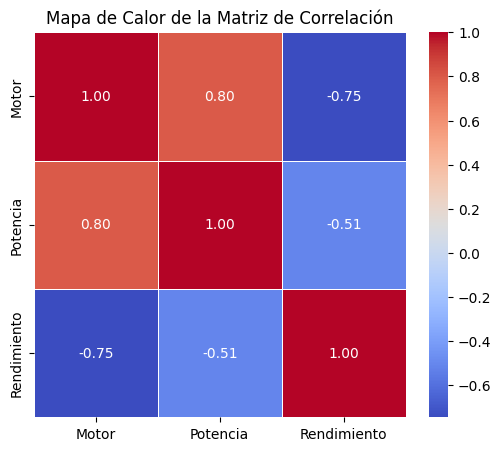

In [ ]:
# 1. Recalcular la matriz de correlación con df_vehiculos limpio
#    (asumiendo que la fila atípica ya fue eliminada)
df_correlacion = df_vehiculos[['Motor', 'Potencia', 'Rendimiento']].corr()

# 2. Configurar la figura y los ejes para el mapa de calor
plt.figure(figsize=(6, 5))

# 3. Generar el mapa de calor (Heatmap)
sns.heatmap(
    df_correlacion,
    annot=True,          # Mostrar el valor numérico (r) en cada celda
    cmap='coolwarm',     # Esquema de color: cool (azul) para positivo, warm (rojo) para negativo
    fmt=".2f",           # Formato a dos decimales
    linewidths=.5,       # Líneas para separar las celdas
    cbar=True            # Mostrar la barra de color lateral
)

# 4. Ajustar el título y mostrar la gráfica
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()
